In [1]:
import matplotlib.pyplot as plt
import corner, os, glob, json
import numpy as np
%matplotlib inline

In [3]:
#Reference directory
topdir = os.getcwd()

# Loading directories n'stuff

Open Datasets

In [55]:
#Open dataset with only background, no pulsar red noise
dataset_1b = '/dataset_1b'
#Open dataset with pulsar red noise and background
dataset_2b = '/dataset_2b'
#Open dataset with cw and background
dataset_3b = '/dataset_3b'

#Run with common red noise, no correlation
runname_1b_1 = '/red_noise_no_corr_2'
runname_1b_2 = '/full_run_2'
#Run with common red noise, HD correlation
runname_1b_3 = '/full_run_3'

#Run with common red noise, no correlation
runname_2b_1 = '/red_noise_no_corr_1'

#Run with common red noise, no correlation
runname_3b_1 = '/red_noise_no_corr_1'

#Where the original data is
origdatadir_open_1b = topdir + '/mdc2/group1' + dataset_1b
origdatadir_open_2b = topdir + '/mdc2/group1' + dataset_2b
origdatadir_open_3b = topdir + '/mdc2/group1' + dataset_3b

#Where the dataset files are located
datadir_open_1b = topdir + dataset_1b
datadir_open_2b = topdir + dataset_2b
datadir_open_3b = topdir + dataset_3b

#Where the everything should be saved to (chains, cornerplts, histograms, etc.)
outdir_open_1b_1 = datadir_open_1b + runname_1b_1
outdir_open_1b_2 = datadir_open_1b + runname_1b_2
outdir_open_1b_3 = datadir_open_1b + runname_1b_3
outdir_open_2b_1 = datadir_open_2b + runname_2b_1
outdir_open_3b_1 = datadir_open_3b + runname_3b_1

#param json file with index in chain
paramfile_open_1b_1 = outdir_open_1b_1 + '/Search_params.json'
paramfile_open_1b_2 = outdir_open_1b_2 + '/Search_params.json'
paramfile_open_1b_3 = outdir_open_1b_3 + '/Search_params.json'
paramfile_open_2b_1 = outdir_open_2b_1 + '/Search_params.json'
paramfile_open_3b_1 = outdir_open_3b_1 + '/Search_params.json'

#Where the json noise file for the open dataset is
noisefile = topdir + '/mdc2/group1/challenge1_psr_noise.json'
#Where the truth values for the open datatset are
truthfile = topdir + '/mdc2/group1/group1_gw_parameters.json'

Closed Datasets

In [12]:
#Closed datasets
dataset_1 = '/dataset_1'
dataset_2 = '/dataset_2'
dataset_3= '/dataset_3'
#Runs with common red noise, no correlation
runname_1_1 = '/full_run_1'
#Refit pars
runname_1_2 = '/red_noise_no_corr_1'

#No refit
runname_2_1 = '/red_noise_no_corr_1'
#Refit pars
runname_2_2 = '/red_noise_no_corr_2'

#No refit
runname_3_1 = '/full_run_1'
#Refit pars
runname_3_2 = '/red_noise_no_corr_1'

#Where the original data is
origdatadir_closed_1 = topdir + '/mdc2/group2' + dataset_1
origdatadir_closed_2 = topdir + '/mdc2/group2' + dataset_2
origdatadir_closed_3 = topdir + '/mdc2/group2' + dataset_3

#Where the dataset files are located
datadir_closed_1 = topdir + dataset_1
datadir_closed_2 = topdir + dataset_2
datadir_closed_3 = topdir + dataset_3

#Where the everything should be saved to (chains, cornerplts, histograms, etc.)
outdir_closed_1_1 = datadir_closed_1 + runname_1_1
outdir_closed_1_2 = datadir_closed_1 + runname_1_2
outdir_closed_2_1 = datadir_closed_2 + runname_2_1
outdir_closed_2_2 = datadir_closed_2 + runname_2_2
outdir_closed_3_1 = datadir_closed_3 + runname_3_1
outdir_closed_3_2 = datadir_closed_3 + runname_3_2

#param json file with index in chain
paramfile_closed_1_1 = outdir_closed_1_1 + '/Search_params.json'
paramfile_closed_1_2 = outdir_closed_1_2 + '/Search_params.json'
paramfile_closed_2_1 = outdir_closed_2_1 + '/Search_params.json'
paramfile_closed_2_2 = outdir_closed_2_2 + '/Search_params.json'
paramfile_closed_3_1 = outdir_closed_3_1 + '/Search_params.json'
paramfile_closed_3_2 = outdir_closed_3_2 + '/Search_params.json'

# Load chains

Open Datasets

In [6]:
#Load chains for open dataset 1b to make corner plots
chain_open_1b_1 = np.loadtxt(outdir_open_1b_1 + '/chain_1.txt')
burn_open_1b_1 = int(0.25 * chain_open_1b_1.shape[0])
chain_open_1b_2 = np.loadtxt(outdir_open_1b_2 + '/chain_1.txt')
burn_open_1b_2 = int(0.25 * chain_open_1b_2.shape[0])
chain_open_1b_3 = np.loadtxt(outdir_open_1b_3 + '/chain_1.txt')
burn_open_1b_3 = int(0.25 * chain_open_1b_3.shape[0])

In [8]:
#Load chains for open dataset 2b to make corner plots
chain_open_2b_1 = np.loadtxt(outdir_open_2b_1 + '/chain_1.txt')
burn_open_2b_1 = int(0.25 * chain_open_2b_1.shape[0])

In [10]:
#Load chains for open dataset 3b to make corner plots
chain_open_3b_1 = np.loadtxt(outdir_open_3b_1 + '/chain_1.txt')
burn_open_3b_1 = int(0.25 * chain_open_3b_1.shape[0])

OSError: /home/andrew/Documents/Research/NANOGrav/MDC2/dataset_3b/red_noise_no_corr_1/chain_1.txt not found.

Closed Datasets

In [13]:
#Load chains for closed dataset 1 to make corner plots
chain_closed_1_1 = np.loadtxt(outdir_closed_1_1 + '/chain_1.txt')
burn_closed_1_1 = int(0.25 * chain_closed_1_1.shape[0])
chain_closed_1_2 = np.loadtxt(outdir_closed_1_2 + '/chain_1.txt')
burn_closed_1_2 = int(0.25 * chain_closed_1_2.shape[0])

In [14]:
#Load chains for closed dataset 2 to make corner plots
chain_closed_2_1 = np.loadtxt(outdir_closed_2_1 + '/chain_1.txt')
burn_closed_2_1 = int(0.25 * chain_closed_2_1.shape[0])
chain_closed_2_2 = np.loadtxt(outdir_closed_2_2 + '/chain_1.txt')
burn_closed_2_2 = int(0.25 * chain_closed_2_2.shape[0])

In [15]:
#Load chains for closed dataset 3 to make corner plots
chain_closed_3_1 = np.loadtxt(outdir_closed_3_1 + '/chain_1.txt')
burn_closed_3_1 = int(0.25 * chain_closed_3_1.shape[0])
chain_closed_3_2 = np.loadtxt(outdir_closed_3_2 + '/chain_1.txt')
burn_closed_3_2 = int(0.25 * chain_closed_3_2.shape[0])

# Load param files to iterate through pulsars in pta

Open Datasets

In [19]:
#Load param files to iterate through pulsars in pta
#1b
with open(paramfile_open_1b_1) as pf:
    param_dict_open_1b_1 = json.load(pf)
    pf.close()
with open(paramfile_open_1b_2) as pf:
    param_dict_open_1b_2 = json.load(pf)
    pf.close()
with open(paramfile_open_1b_3) as pf:
    param_dict_open_1b_3 = json.load(pf)
    pf.close()
#2b
with open(paramfile_open_2b_1) as pf:
    param_dict_open_2b_1 = json.load(pf)
    pf.close()

#Load truth values for open dataset
with open(truthfile) as tf:
    truths = json.load(tf)
    tf.close()

Closed Datasets

In [20]:
#Load param files to iterate through pulsars in pta
#1
with open(paramfile_closed_1_1) as pf:
    param_dict_closed_1_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_1_2) as pf:
    param_dict_closed_1_2 = json.load(pf)
    pf.close()
#2
with open(paramfile_closed_2_1) as pf:
    param_dict_closed_2_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_2_2) as pf:
    param_dict_closed_2_2 = json.load(pf)
    pf.close()
#3
with open(paramfile_closed_3_1) as pf:
    param_dict_closed_3_1 = json.load(pf)
    pf.close()
with open(paramfile_closed_3_2) as pf:
    param_dict_closed_3_2 = json.load(pf)
    pf.close()


# Fun corner plots for individual pulsars from whichever dataset

In [21]:
#Looking at all noise parameters for a particular pulsar
psrs = []
for psr in param_dict_open_1b_2.keys():
    psrs.append(psr)

plot_psr = 'J1909-3744'
#plot_psr = psrs[-1]

print('Looking at pulsar ' + plot_psr)

psr_noise_names = []
psr_noise_idx = []

if plot_psr in param_dict_open_1b_2:
    for psr, params in param_dict_open_1b_2.items():
        if psr == plot_psr:
            for param_names, param_idx in params.items():
                psr_noise_names.append(param_names)
                psr_noise_idx.append(param_idx)
else:
    print('That pulsar is not in the pta.')

Looking at pulsar J1909-3744


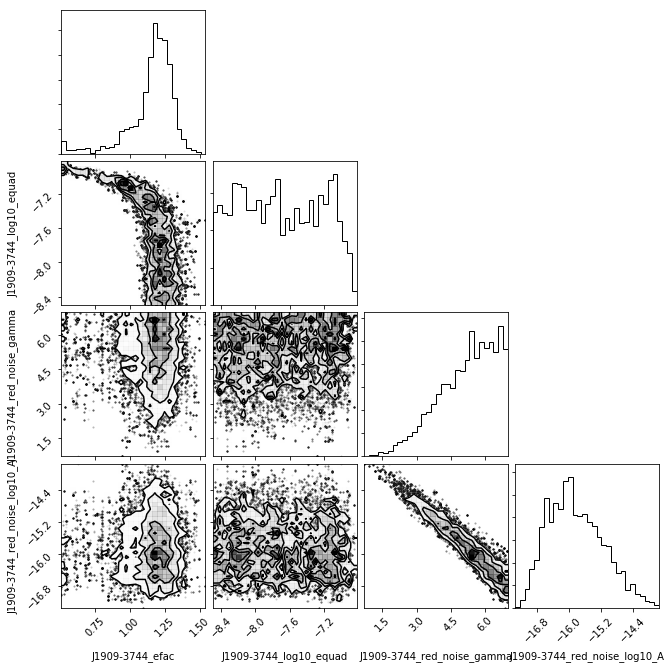

In [22]:
#pulsar corner plot
corner.corner(chain_open_1b_2[burn_open_1b_2:,psr_noise_idx], 30, labels=psr_noise_names);
plt.show()
#Plot and save corner plots
#plt.savefig(outdir + runname + '_cornerplt.png')
#plt.close()

# Load parameter details for parameters of interest

In [23]:
#Pulsar parameters we want to look at
param_of_interests = ['red_noise_log10_A','red_noise_gamma']

Open Datasets

In [24]:
#Open 1b
#Look at all of one parameter in open_1b_1 run
psr_param_names_open_1b_1 = []
psr_param_idx_open_1b_1 = []

for psr, params in param_dict_open_1b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_1.append(param_names)
                psr_param_idx_open_1b_1.append(param_idx)
                
#Look at all of one parameter in open_1b_2 run
psr_param_names_open_1b_2 = []
psr_param_idx_open_1b_2 = []

for psr, params in param_dict_open_1b_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_2.append(param_names)
                psr_param_idx_open_1b_2.append(param_idx)

#Look at all of one parameter in open_1b_3 run
psr_param_names_open_1b_3 = []
psr_param_idx_open_1b_3 = []

for psr, params in param_dict_open_1b_3.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_1b_3.append(param_names)
                psr_param_idx_open_1b_3.append(param_idx)

In [27]:
#Open 2b
#Look at all of one parameter in open_2b_1 run
psr_param_names_open_2b_1 = []
psr_param_idx_open_2b_1 = []

for psr, params in param_dict_open_2b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_2b_1.append(param_names)
                psr_param_idx_open_2b_1.append(param_idx)

In [ ]:
#Open 3b
#Look at all of one parameter in open_3b_1 run
psr_param_names_open_3b_1 = []
psr_param_idx_open_3b_1 = []

for psr, params in param_dict_open_3b_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_open_3b_1.append(param_names)
                psr_param_idx_open_3b_1.append(param_idx)

Closed Datasets

In [28]:
#Closed 1
#Look at all of one parameter in closed_1_1 run
psr_param_names_closed_1_1 = []
psr_param_idx_closed_1_1 = []

for psr, params in param_dict_closed_1_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_1_1.append(param_names)
                psr_param_idx_closed_1_1.append(param_idx)
                
#Look at all of one parameter in closed_1_2 run
psr_param_names_closed_1_2 = []
psr_param_idx_closed_1_2 = []

for psr, params in param_dict_closed_1_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_1_2.append(param_names)
                psr_param_idx_closed_1_2.append(param_idx)

In [29]:
#Closed 2
#Look at all of one parameter in closed_2_1 run
psr_param_names_closed_2_1 = []
psr_param_idx_closed_2_1 = []

for psr, params in param_dict_closed_2_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_1.append(param_names)
                psr_param_idx_closed_2_1.append(param_idx)
            
#Look at all of one parameter in closed_2_2 run
psr_param_names_closed_2_2 = []
psr_param_idx_closed_2_2 = []

for psr, params in param_dict_closed_2_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_2_2.append(param_names)
                psr_param_idx_closed_2_2.append(param_idx)

In [30]:
#Closed 3
#Look at all of one parameter in closed_3_1 run
psr_param_names_closed_3_1 = []
psr_param_idx_closed_3_1 = []

for psr, params in param_dict_closed_3_1.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_3_1.append(param_names)
                psr_param_idx_closed_3_1.append(param_idx)
                
#Look at all of one parameter in closed_3_2 run
psr_param_names_closed_3_2 = []
psr_param_idx_closed_3_2 = []

for psr, params in param_dict_closed_3_2.items():
    for param_of_interest in param_of_interests:
        for param_names, param_idx in params.items():
            if param_names.endswith(param_of_interest):
                psr_param_names_closed_3_2.append(param_names)
                psr_param_idx_closed_3_2.append(param_idx)

# Display individual pulsar histograms from all runs

In [31]:
#display all histograms for particular parameter (ie. red_noise_log10_A)
def draw_histograms(data, labels, indices):
    n_cols = 4
    n_rows = int(len(labels)/n_cols)
    n_bins = 50
    fig,axarr =plt.subplots(nrows=n_rows,ncols=n_cols,figsize=(20,55))
    ii = 0
    for i in range(n_rows):
        for j in range(n_cols):
            axarr[i][j].hist(data[:,indices[ii]],bins=n_bins, density=True,histtype = 'step')
            axarr[i][j].set_xlabel(labels[ii])
            ii += 1
    fig.tight_layout()
    plt.show()

Open Datasets

In [ ]:
#display all histograms for open_1b_1 run
draw_histograms(chain_open_1b_1[burn_open_1b_1:,:],\
                psr_param_names_open_1b_1,psr_param_idx_open_1b_1)

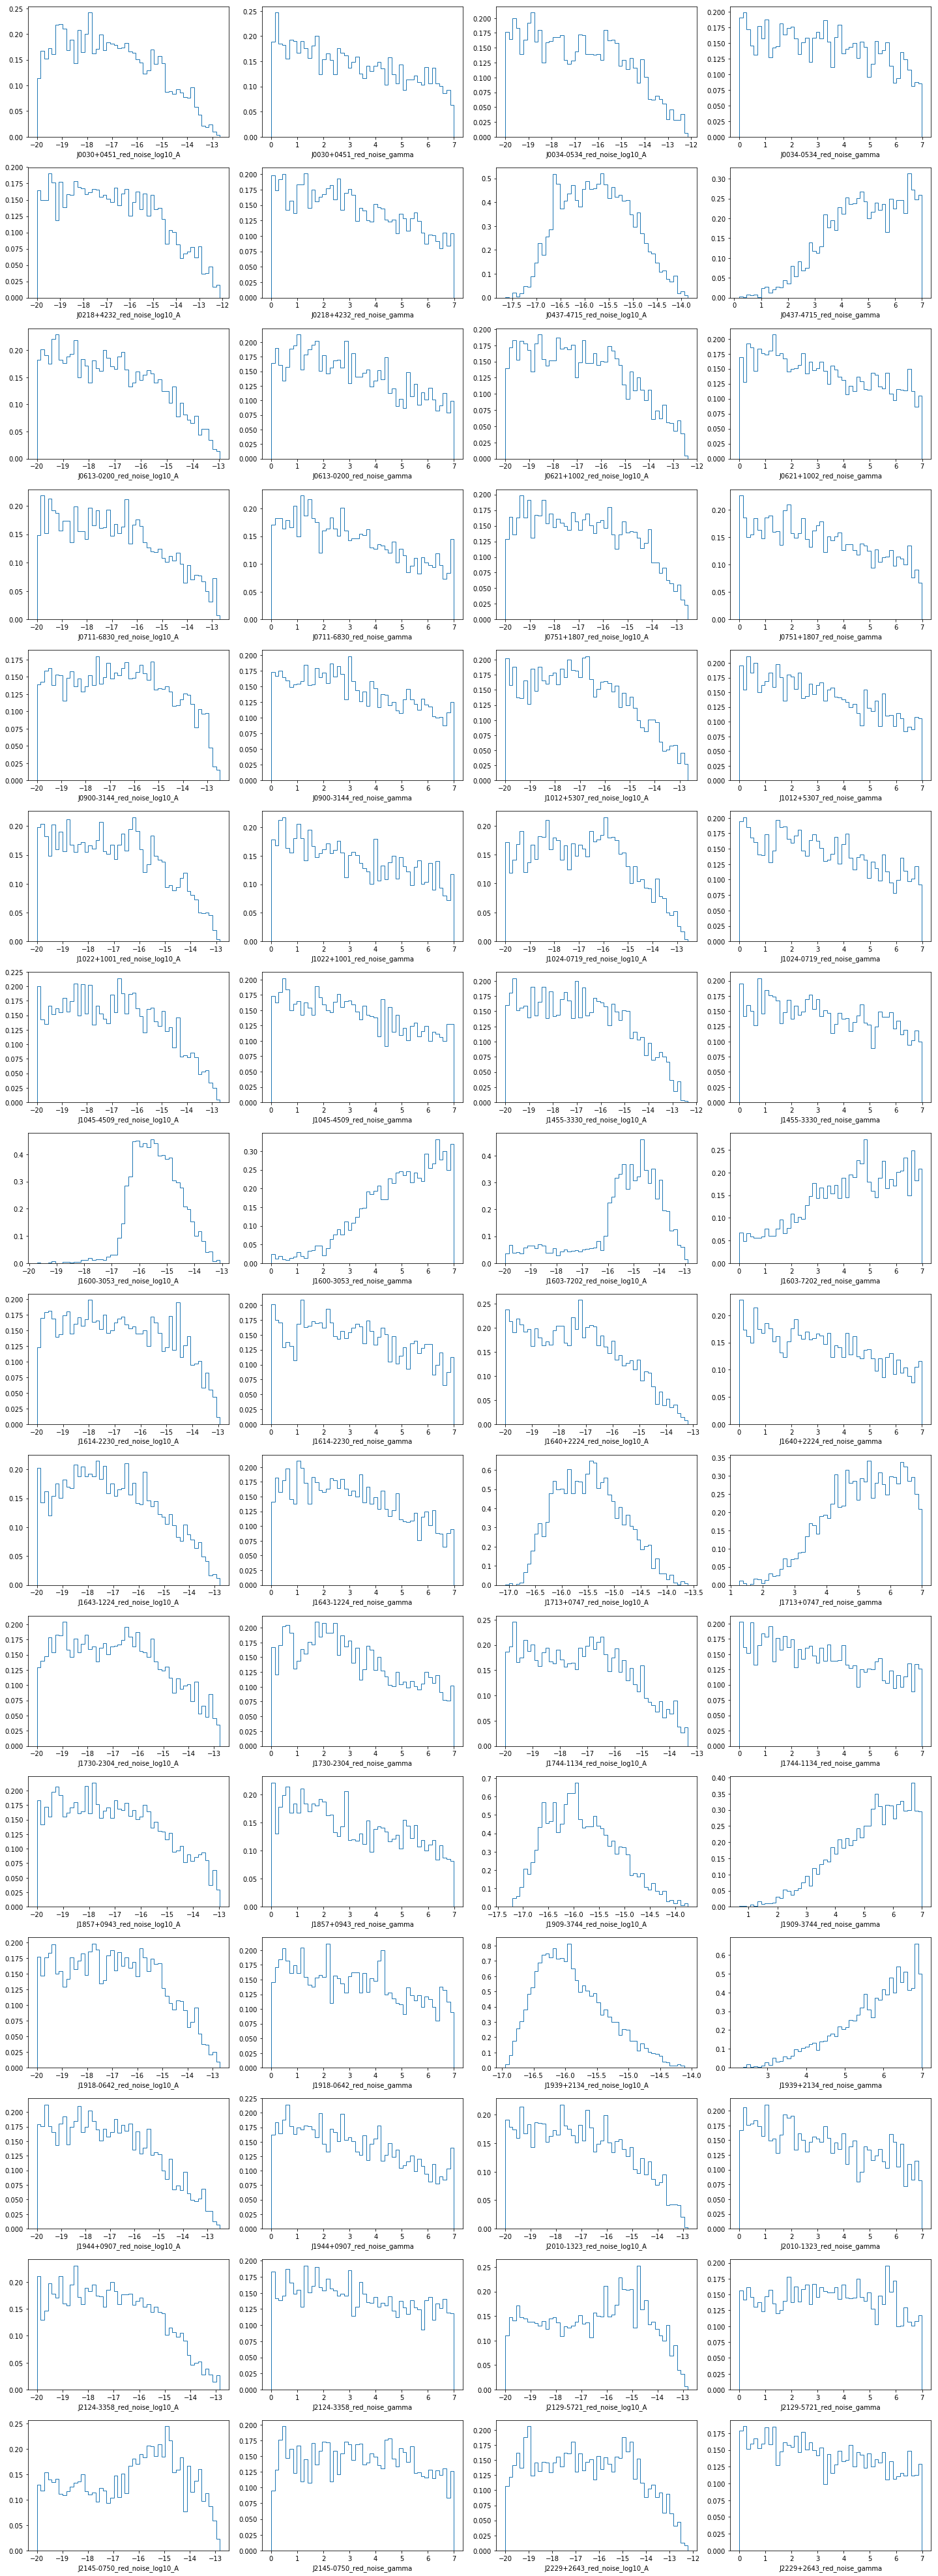

In [32]:
#display all histograms for open_1b_2 run
draw_histograms(chain_open_1b_2[burn_open_1b_2:,:],\
                psr_param_names_open_1b_2,psr_param_idx_open_1b_2)

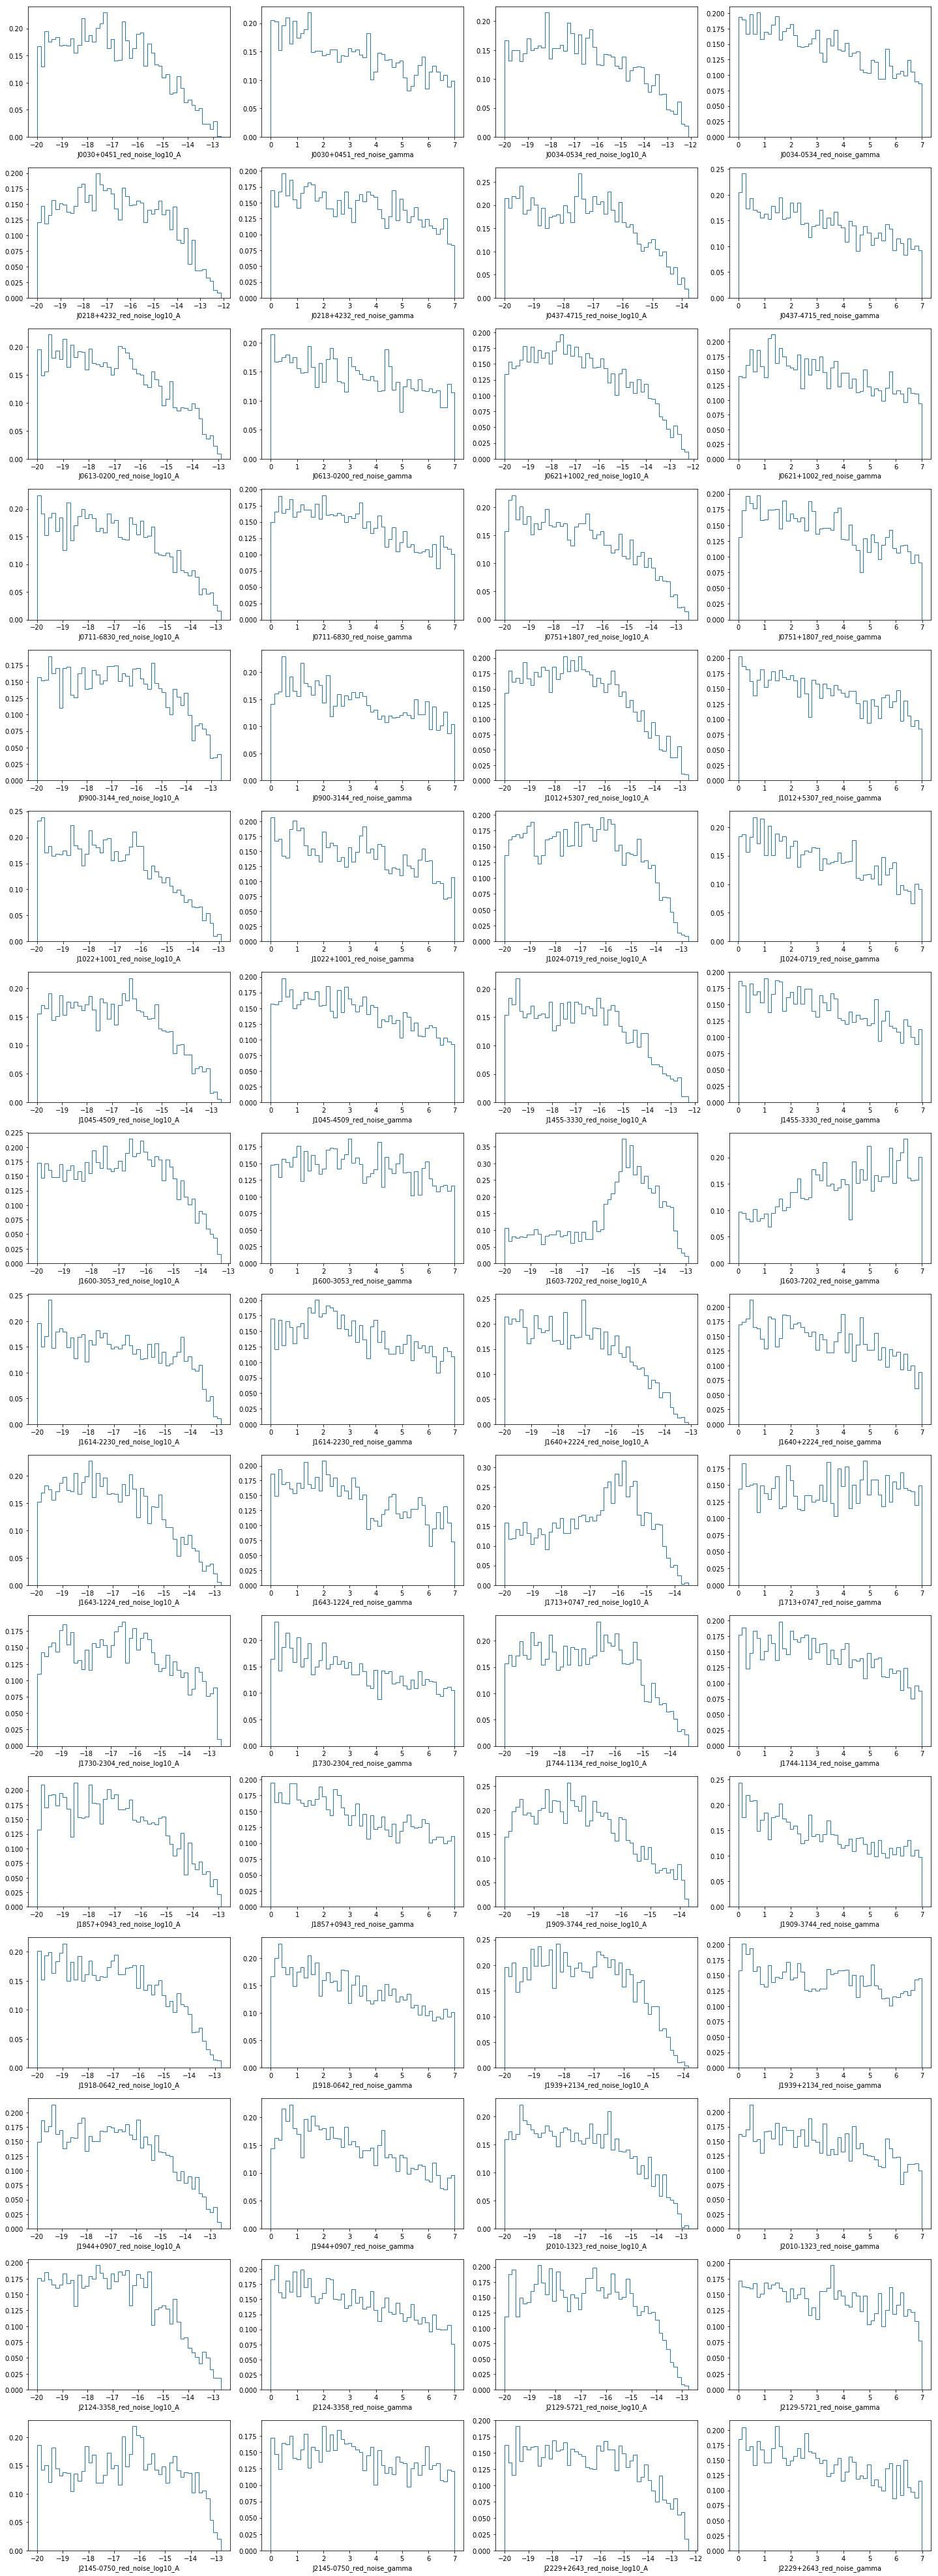

In [34]:
#display all histograms for open_1b_3 run
draw_histograms(chain_open_1b_3[burn_open_1b_3:,:],\
                psr_param_names_open_1b_3,psr_param_idx_open_1b_3)

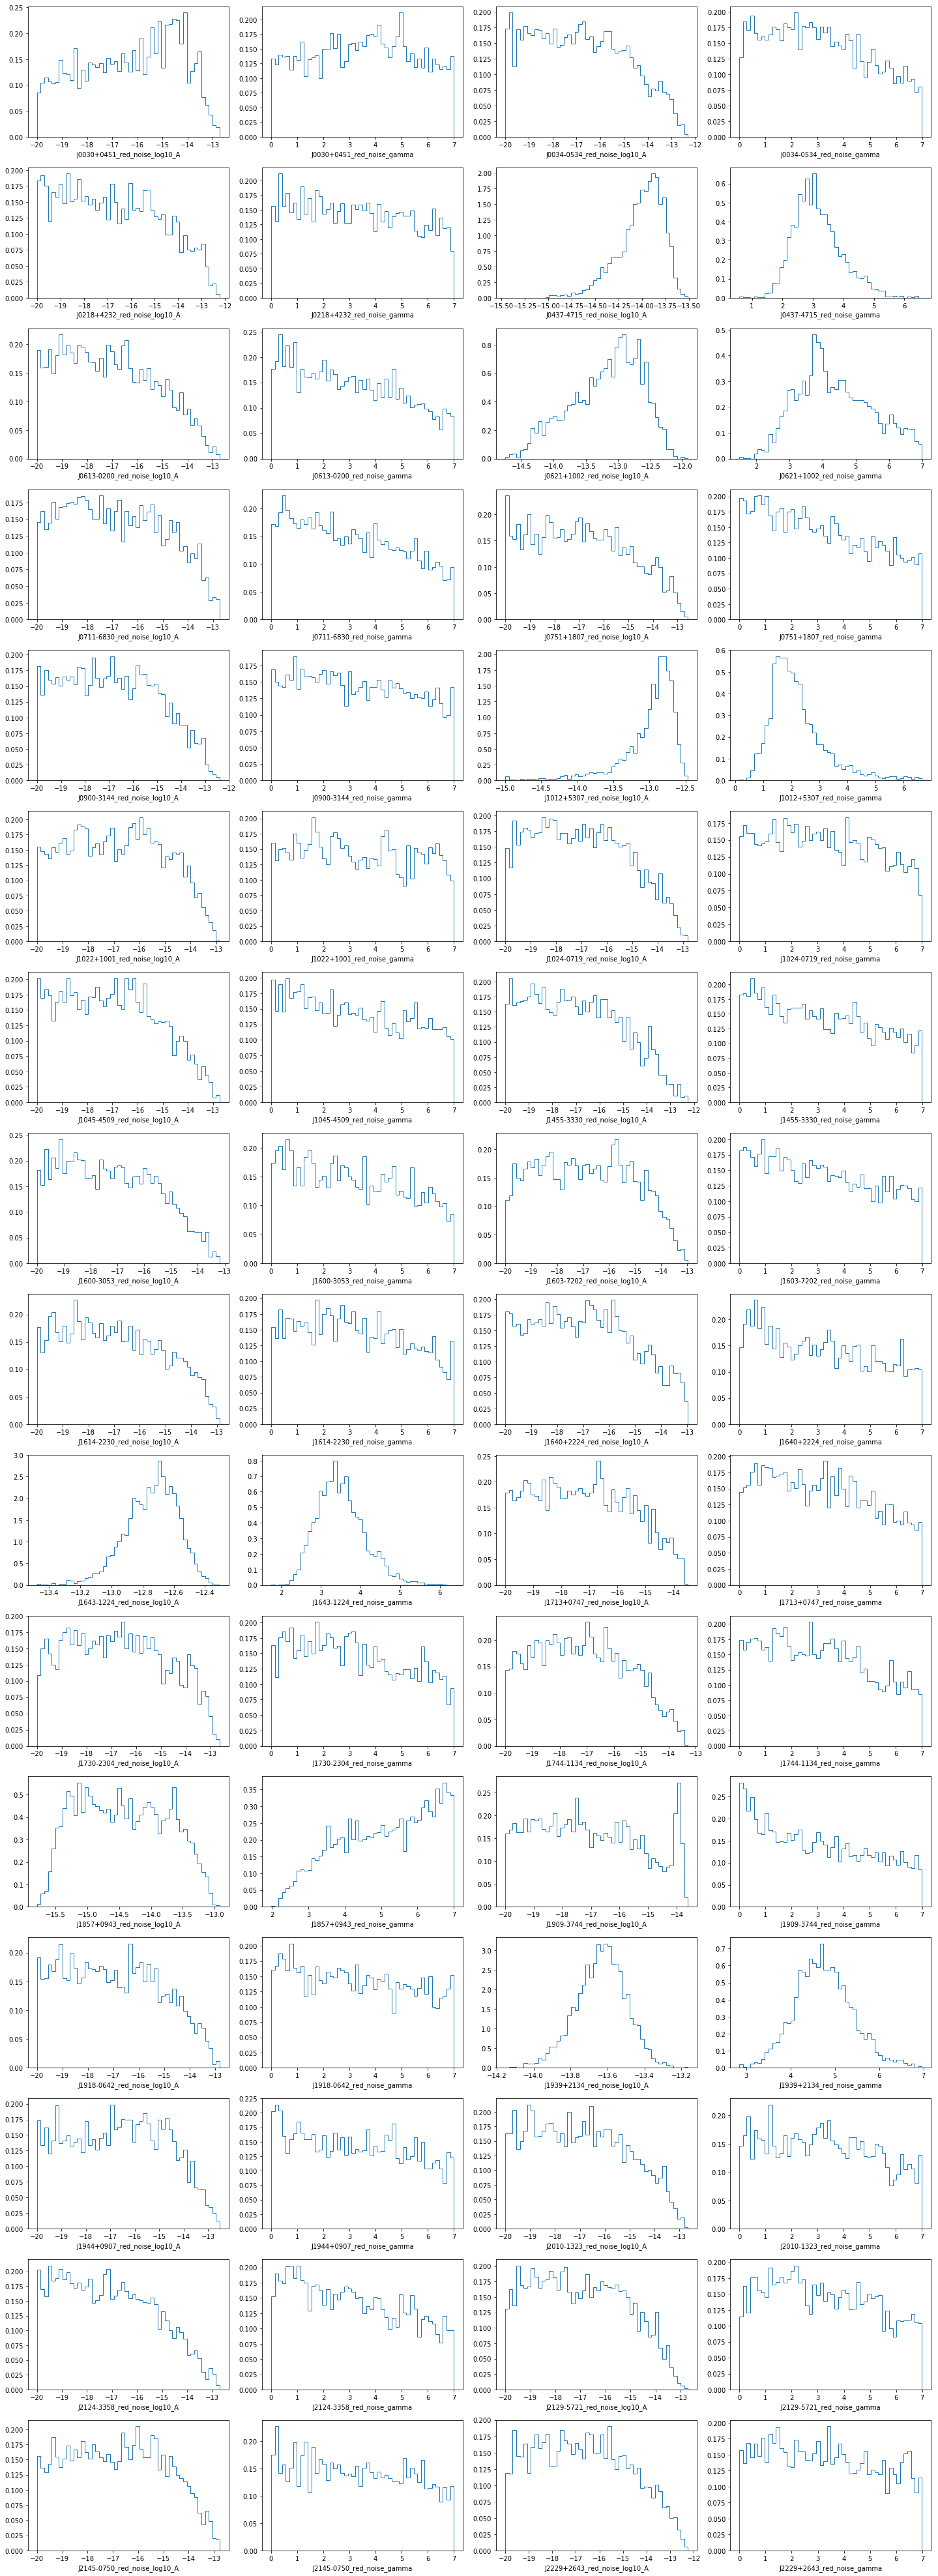

In [33]:
#display all histograms for open_2b_1 run
draw_histograms(chain_open_2b_1[burn_open_2b_1:,:],\
                psr_param_names_open_2b_1,psr_param_idx_open_2b_1)

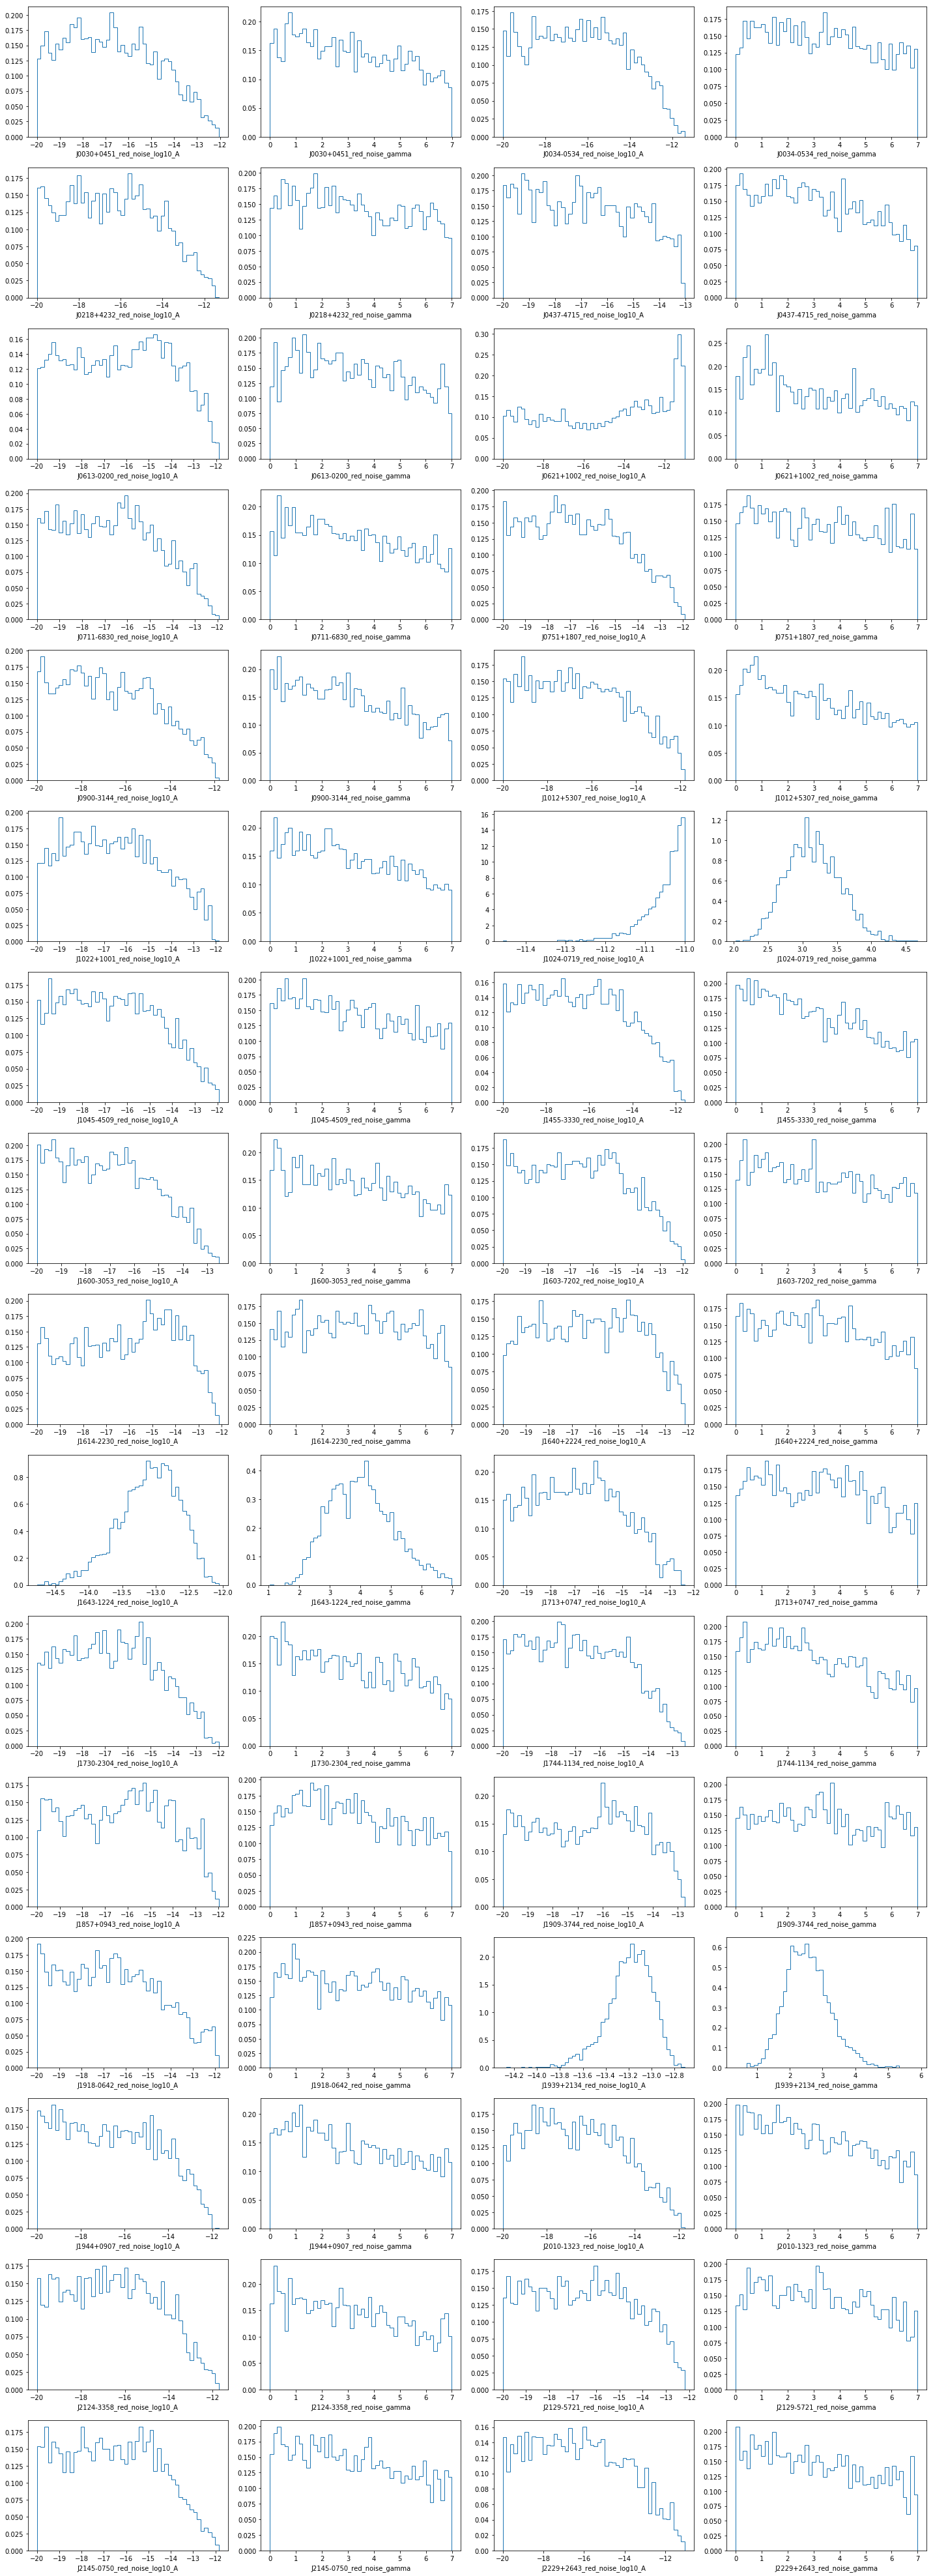

In [24]:
#display all histograms for closed_1_1 run
draw_histograms(chain_closed_1_1[burn_closed_1_1:,:],\
                psr_param_names_closed_1_1,psr_param_idx_closed_1_1)

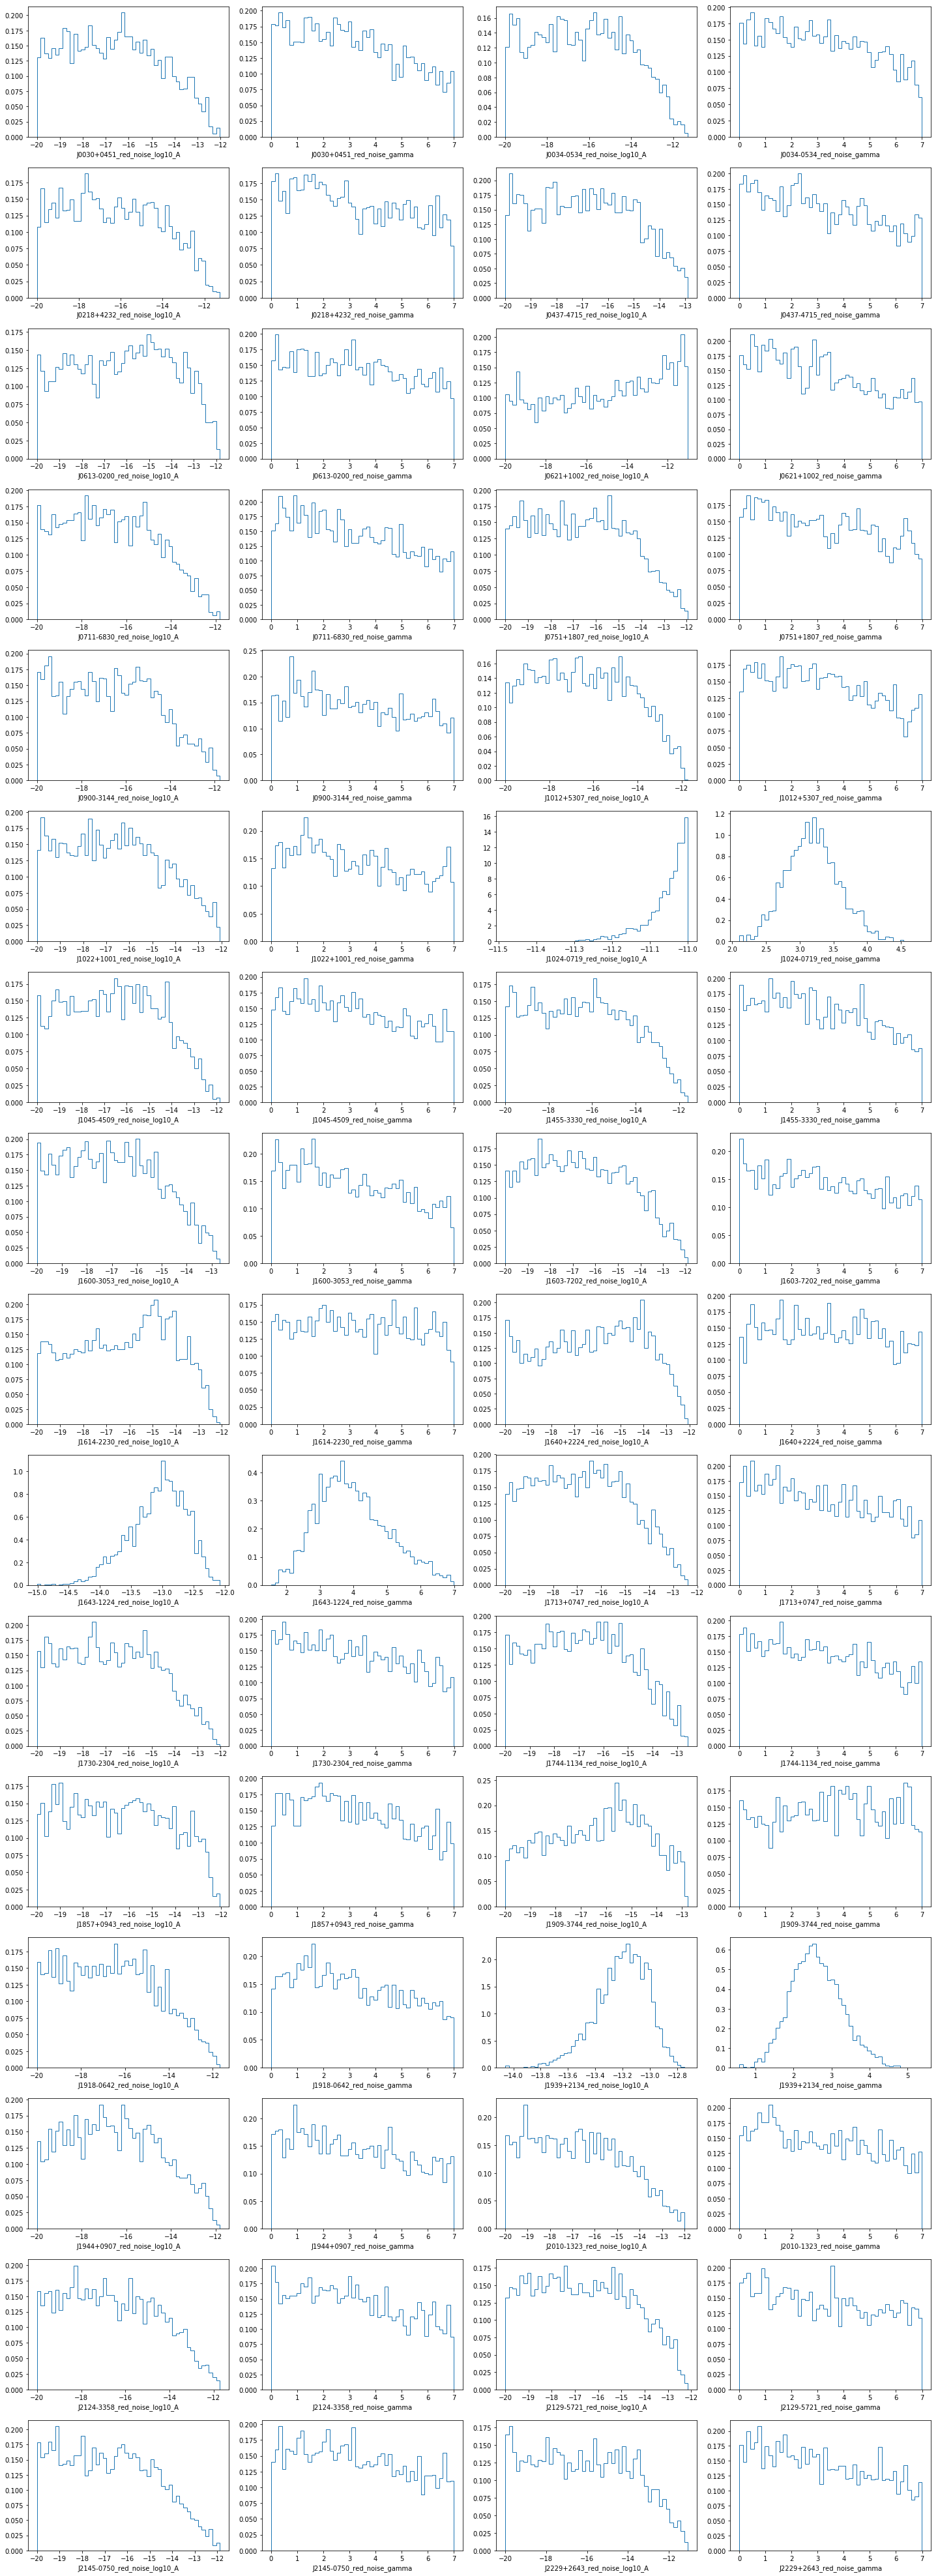

In [52]:
#display all histograms for closed_1_2 run
draw_histograms(chain_closed_1_2[burn_closed_1_2:,:],\
                psr_param_names_closed_1_2,psr_param_idx_closed_1_2)

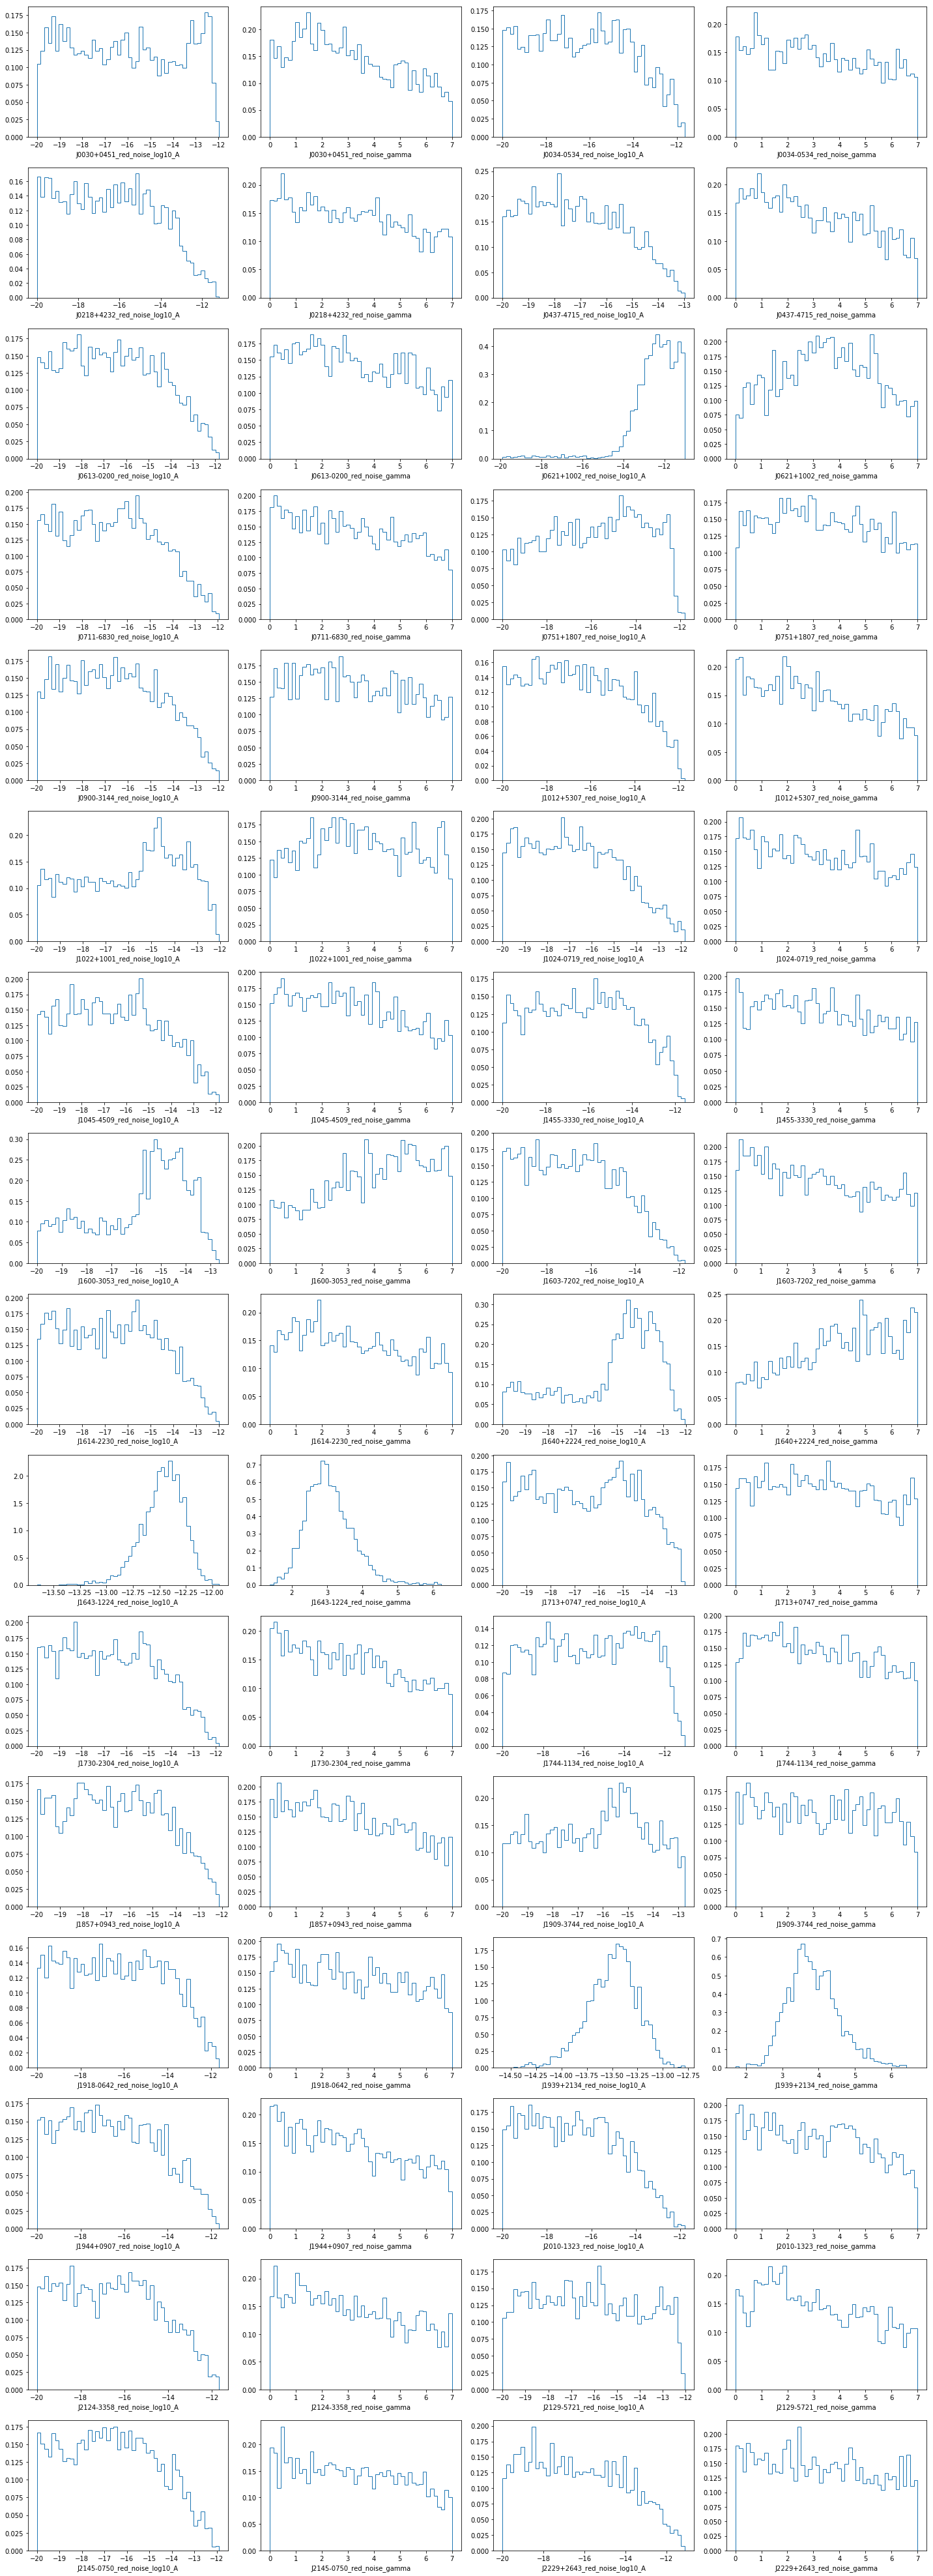

In [53]:
#display all histograms for closed_2_1 run
draw_histograms(chain_closed_2_1[burn_closed_2_1:,:],\
                psr_param_names_closed_2_1,psr_param_idx_closed_2_1)

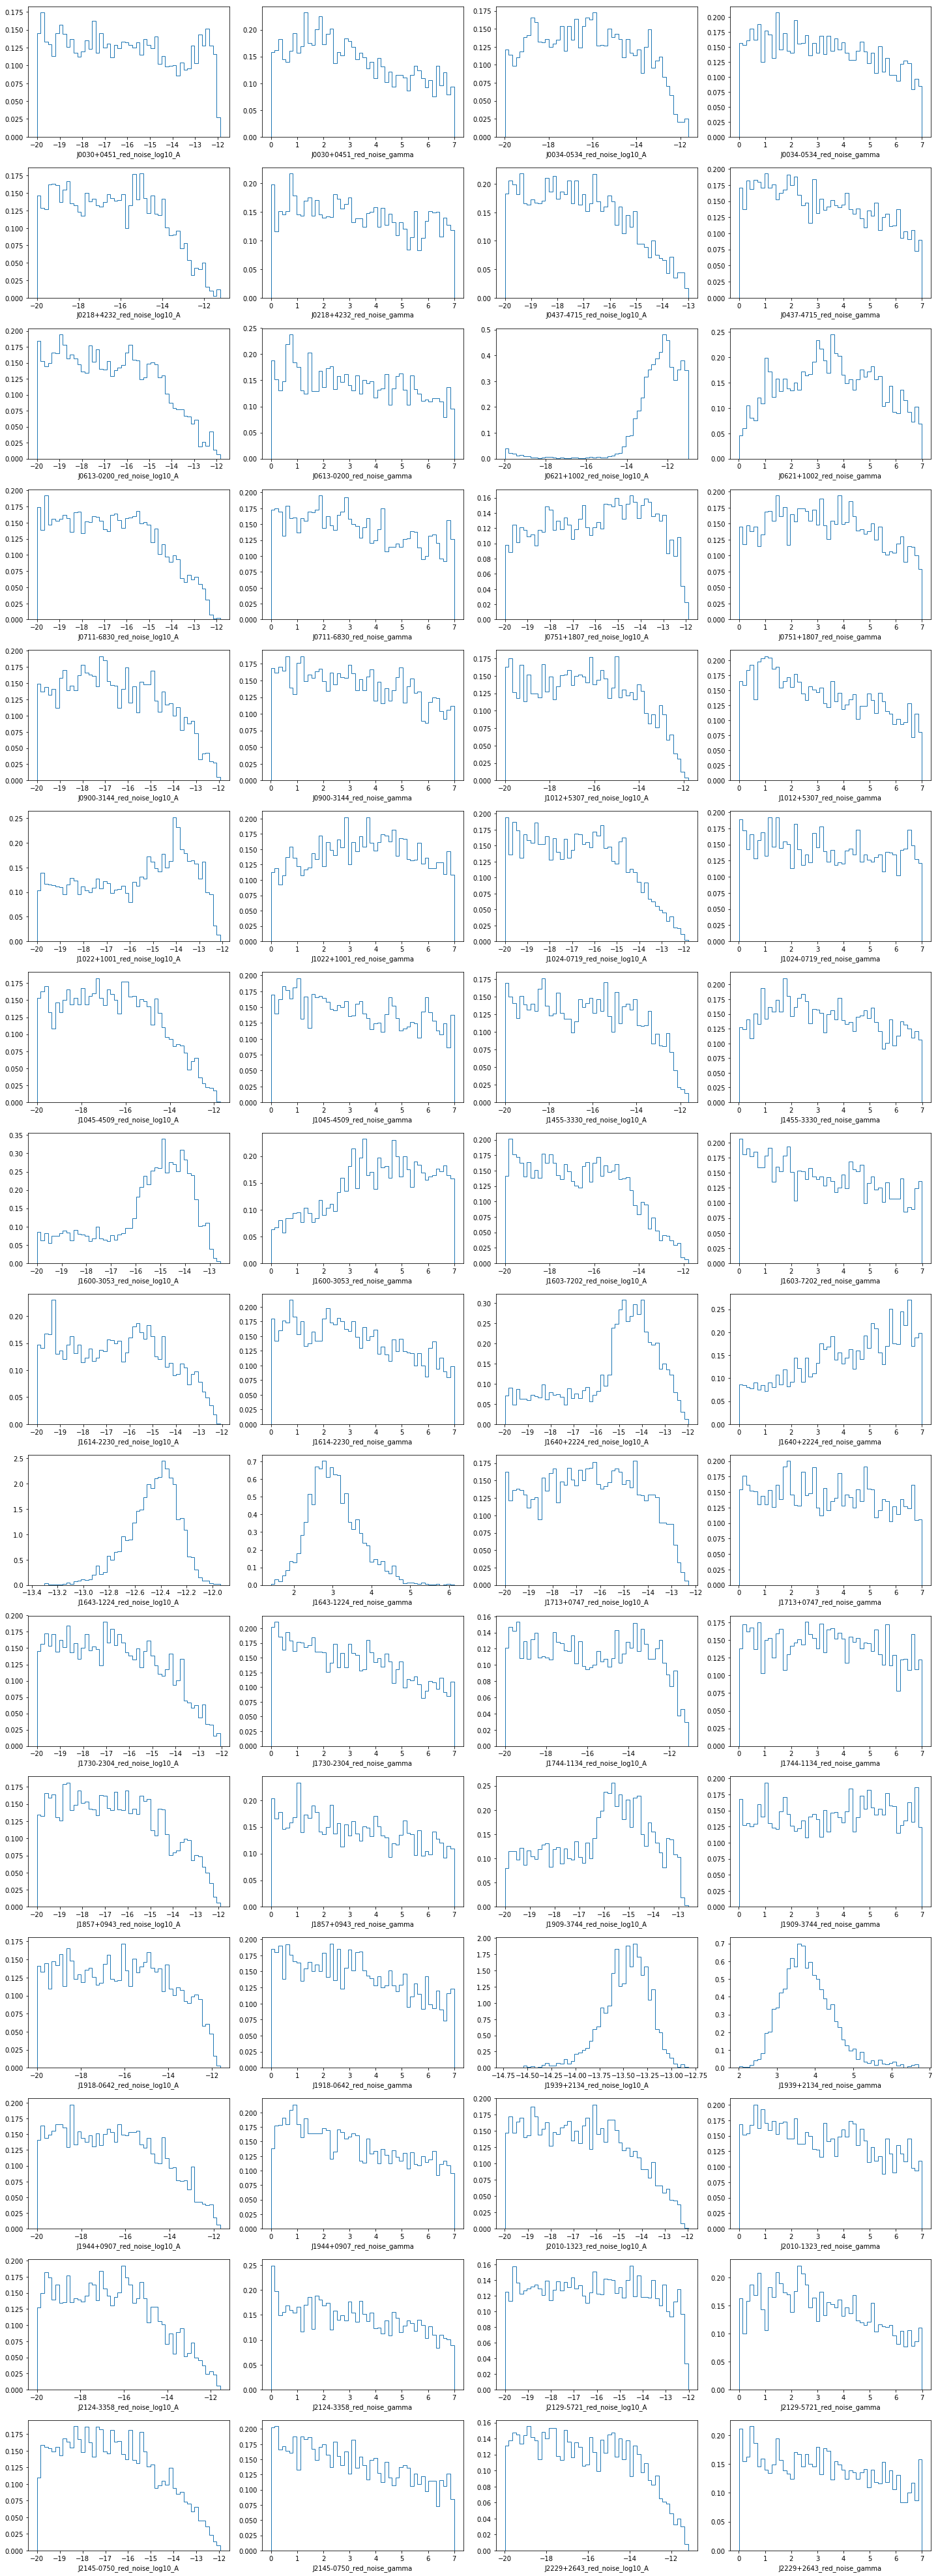

In [54]:
#display all histograms for closed_2_2 run
draw_histograms(chain_closed_2_2[burn_closed_2_2:,:],\
                psr_param_names_closed_2_2,psr_param_idx_closed_2_2)

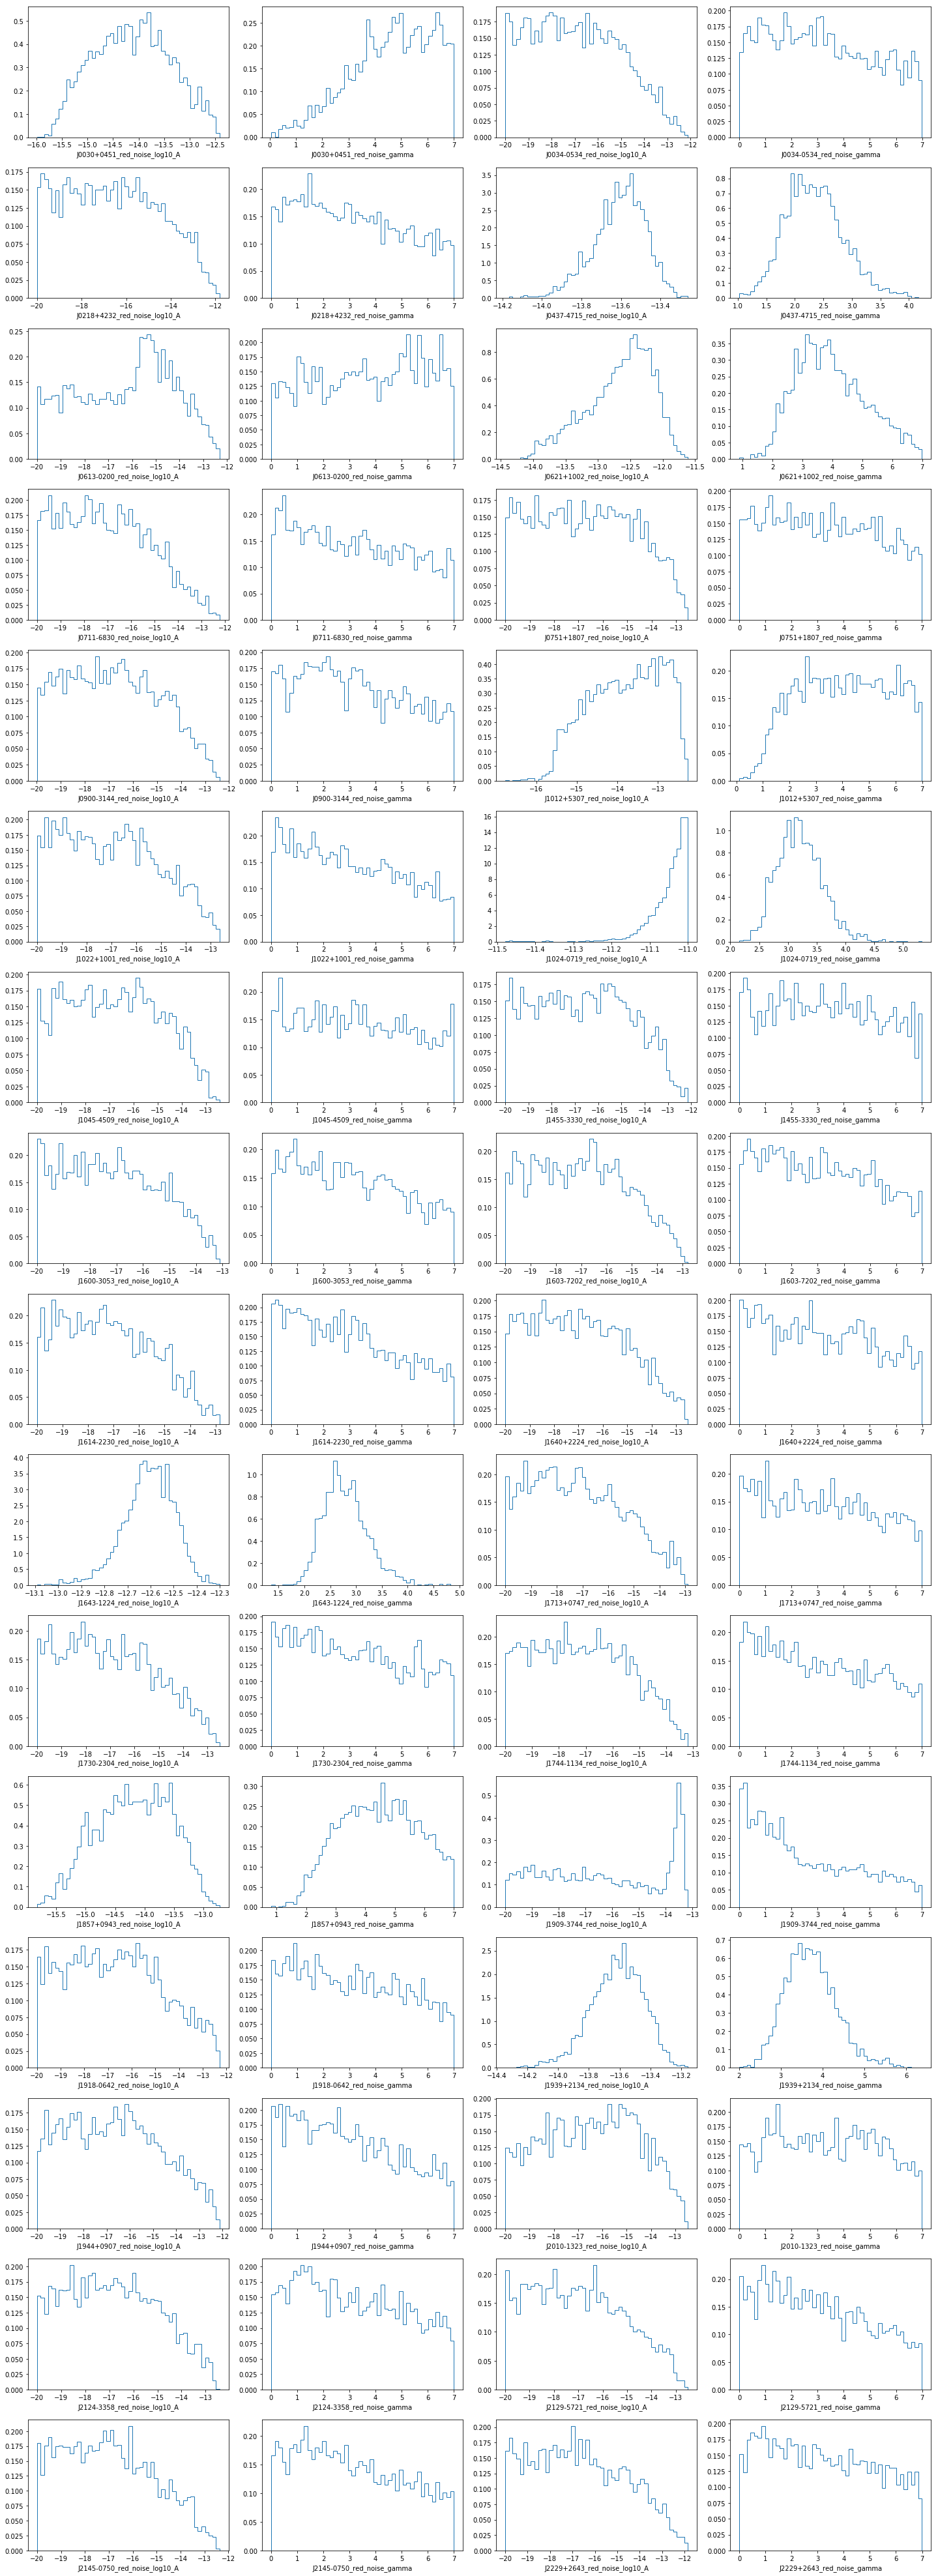

In [19]:
#display all histograms for closed_3_1 run
draw_histograms(chain_closed_3_1[burn_closed_3_1:,:],\
                psr_param_names_closed_3_1,psr_param_idx_closed_3_1)

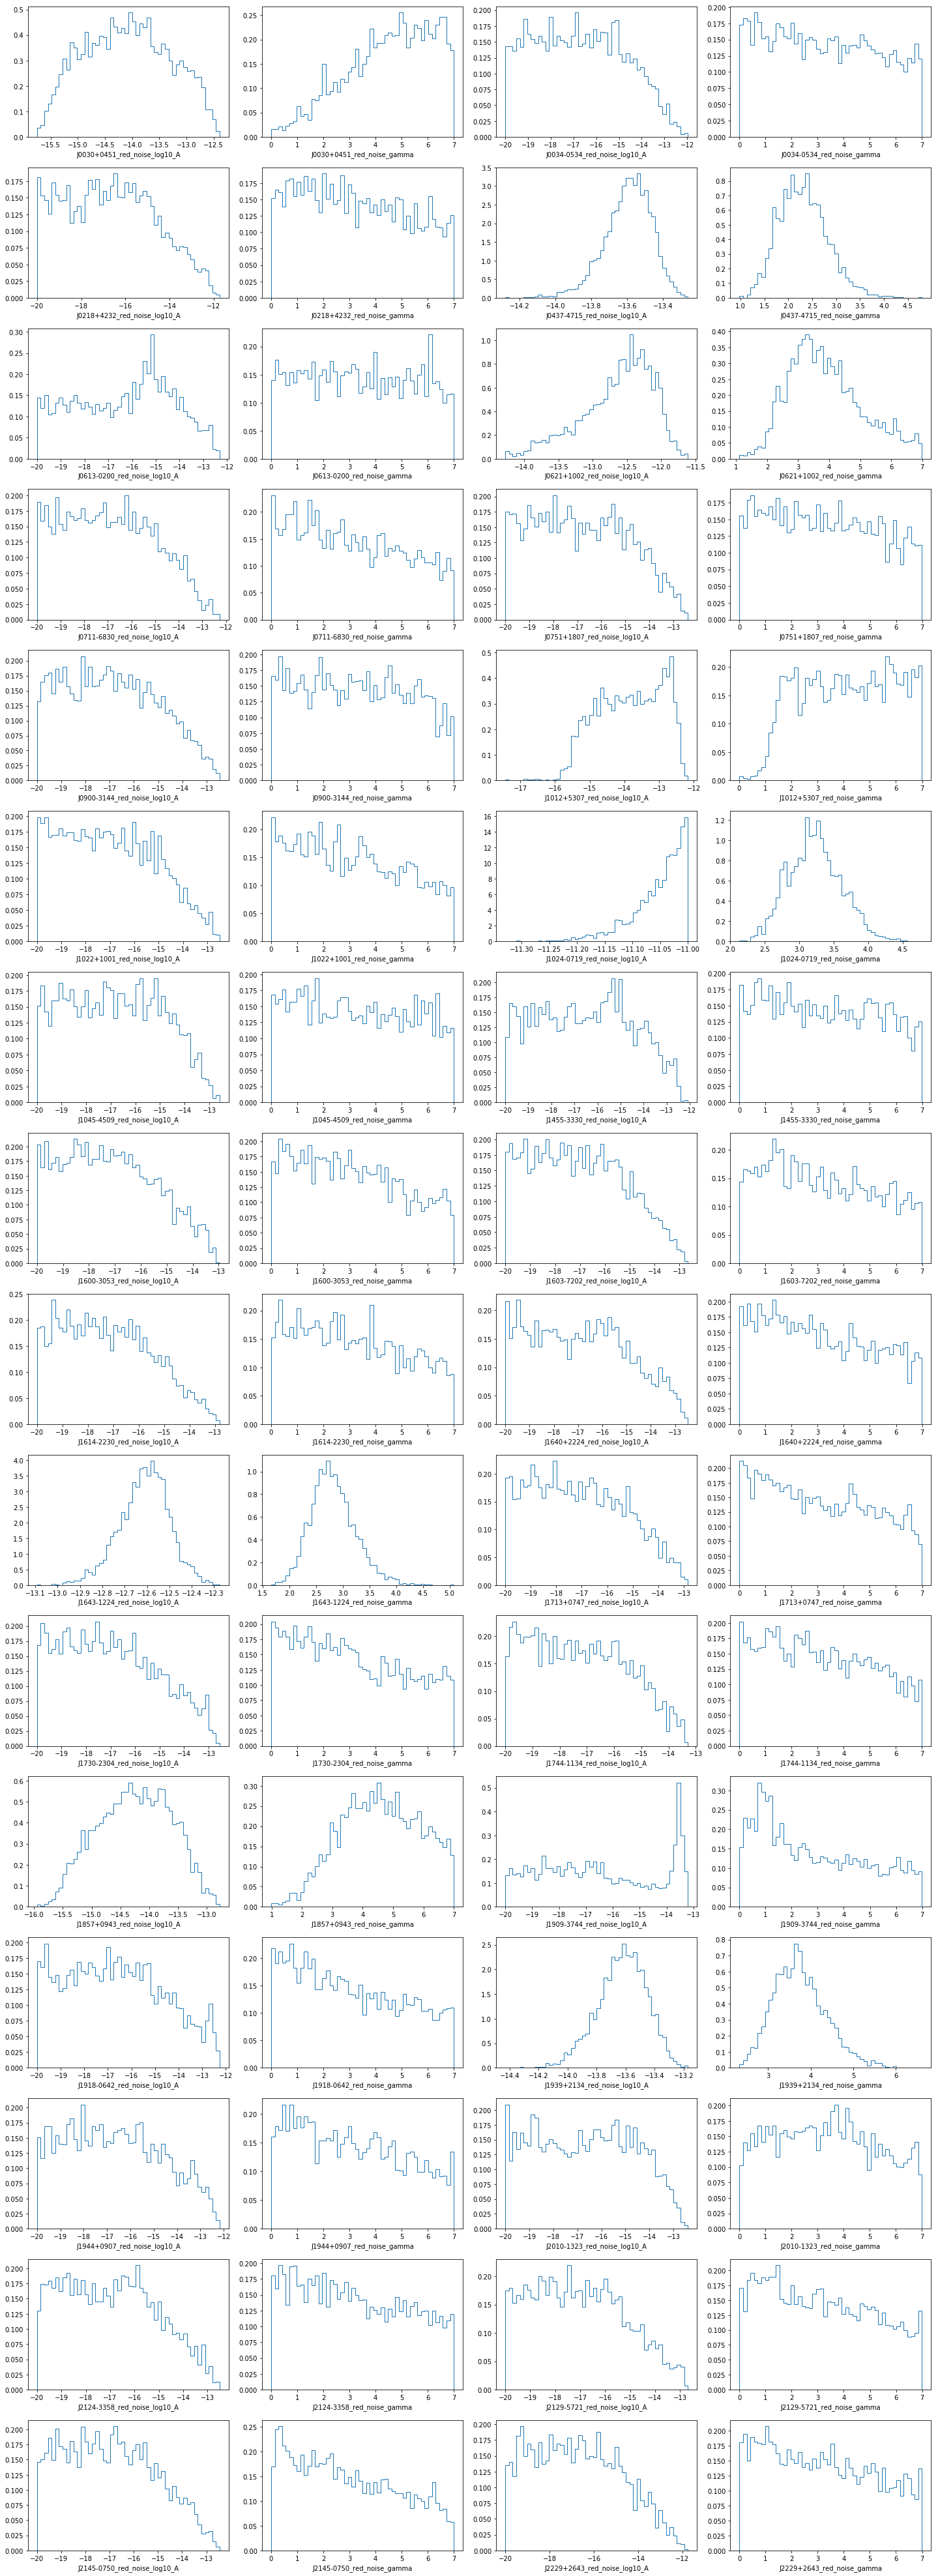

In [20]:
#display all histograms for closed_3_2 run
draw_histograms(chain_closed_3_2[burn_closed_3_2:,:],\
                psr_param_names_closed_3_2,psr_param_idx_closed_3_2)

In [44]:
truth_params_1b = []
truth_vals_1b = []
truth_params_2b = []
truth_vals_2b = []
truth_params_3b = []
truth_vals_3b = []

for dataset, info in truths.items():
    for truth_params, truth_vals in info.items():
        if dataset == 'dataset1':
            truth_params_1b.append(truth_params)
            truth_vals_1b.append(truth_vals)
        if dataset == 'dataset2':
            truth_params_2b.append(truth_params)
            truth_vals_2b.append(truth_vals)
        if dataset == 'dataset3':
            truth_params_3b.append(truth_params)
            truth_vals_3b.append(truth_vals)

# GW search histograms

In [36]:
#parameters for gw search and histogram display
index_from_eof = -5
n_bins = 50
pars = ['gamma_gw','log10_A_gw','Log Likelihood?','Log Likelihood?','acceptance rate','Something']

Open Datasets

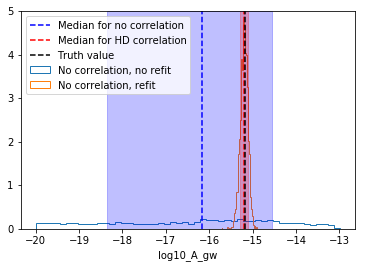

In [49]:
#Plot upperlimit histogram on gwb for open dataset 1b
log = True

if log == False:
    plt_chain_open_1b_1 = 10**chain_open_1b_1[burn_open_1b_1:,index_from_eof]
    plt_chain_open_1b_2 = 10**chain_open_1b_2[burn_open_1b_2:,index_from_eof-1]
    plt_chain_open_1b_3 = 10**chain_open_1b_3[burn_open_1b_3:,index_from_eof]
    truth_val_gwb_1b = 10**truth_vals_1b[0]
else:
    plt_chain_open_1b_1 = chain_open_1b_1[burn_open_1b_1:,index_from_eof]
    plt_chain_open_1b_2 = chain_open_1b_2[burn_open_1b_2:,index_from_eof-1]
    plt_chain_open_1b_3 = chain_open_1b_3[burn_open_1b_3:,index_from_eof]
    truth_val_gwb_1b = truth_vals_1b[0]

#Get median of GWB histogram
gwb_med_open_1b_1 = np.median(plt_chain_open_1b_1)
gwb_med_open_1b_2 = np.median(plt_chain_open_1b_2)
gwb_med_open_1b_3 = np.median(plt_chain_open_1b_3)
#Get avg of GWB histogram
gwb_mean_open_1b_1 = np.mean(plt_chain_open_1b_1)
gwb_mean_open_1b_2 = np.mean(plt_chain_open_1b_2)
gwb_mean_open_1b_3 = np.mean(plt_chain_open_1b_3)
#Get std dev of GWB histogram
gwb_sigma_open_1b_1 = np.std(plt_chain_open_1b_1)
gwb_sigma_open_1b_2 = np.std(plt_chain_open_1b_2)
gwb_sigma_open_1b_3 = np.std(plt_chain_open_1b_3)

plt.hist(plt_chain_open_1b_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')
plt.hist(plt_chain_open_1b_2, bins = n_bins, density = True,histtype = 'step',label = 'No Correlation, no refit')
plt.hist(plt_chain_open_1b_3, bins = n_bins, density = True,histtype = 'step',label = 'HD correlation, no refit')
plt.axvline(x=gwb_med_open_1b_1, linestyle = '--', color = 'b', label = 'Median for no correlation, refit')
plt.axvline(x=gwb_med_open_1b_2, linestyle = '--', color = 'r', label = 'Median for no correlation')
plt.axvline(x=gwb_med_open_1b_3, linestyle = '--', color = 'g', label = 'Median for HD correlation')
plt.axvline(x=truth_val_gwb_1b, linestyle = '--', color = 'k', label = 'Truth value')
plt.axvspan(gwb_mean_open_1b_1-gwb_sigma_open_1b_1, gwb_mean_open_1b_1+gwb_sigma_open_1b_1, alpha=0.25, color='b')
plt.axvspan(gwb_mean_open_1b_2-gwb_sigma_open_1b_2, gwb_mean_open_1b_2+gwb_sigma_open_1b_2, alpha=0.25, color='r')
plt.axvspan(gwb_mean_open_1b_3-gwb_sigma_open_1b_3, gwb_mean_open_1b_3+gwb_sigma_open_1b_3, alpha=0.25, color='g')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left')
plt.show()
#plt.close()

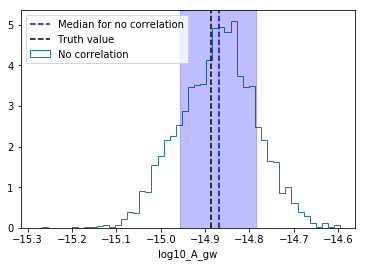

In [53]:
#Plot upperlimit histogram on gwb for open dataset 2b
log = True

if log == False:
    plt_chain_open_2b_1 = 10**chain_open_2b_1[burn_open_2b_1:,index_from_eof]
    truth_val_gwb_2b = 10**truth_vals_2b[0]
else:
    plt_chain_open_2b_1 = chain_open_2b_1[burn_open_2b_1:,index_from_eof]
    truth_val_gwb_2b = truth_vals_2b[0]

#Get median of GWB histogram
gwb_med_open_2b_1 = np.median(plt_chain_open_2b_1)
#Get avg and std dev of GWB histogram
gwb_mean_open_2b_1 = np.mean(plt_chain_open_2b_1)
gwb_sigma_open_2b_1 = np.std(plt_chain_open_2b_1)
    
plt.hist(plt_chain_open_2b_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation')
plt.axvline(x=gwb_med_open_2b_1, linestyle = '--', color = 'b', label = 'Median for no correlation')
plt.axvline(x=truth_val_gwb_2b, linestyle = '--', color = 'k', label = 'Truth value')
plt.axvspan(gwb_mean_open_2b_1-gwb_sigma_open_2b_1, gwb_mean_open_2b_1+gwb_sigma_open_2b_1, alpha=0.25, color='b')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left')
plt.show()

Closed Datasets

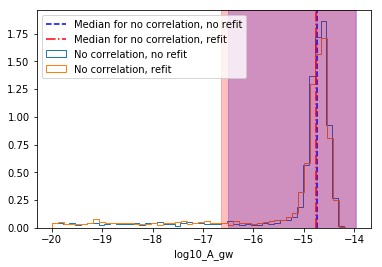

In [54]:
#Plot upperlimit histogram on gwb for closed_1_1 and closed_1_2
log = True

if log == False:
    plt_chain_closed_1_1 = 10**chain_closed_1_1[burn_closed_1_1:,index_from_eof]
    plt_chain_closed_1_2 = 10**chain_closed_1_2[burn_closed_1_2:,index_from_eof]
else:
    plt_chain_closed_1_1 = chain_closed_1_1[burn_closed_1_1:,index_from_eof]
    plt_chain_closed_1_2 = chain_closed_1_2[burn_closed_1_2:,index_from_eof]

#Get median of GWB histogram
gwb_med_closed_1_1 = np.median(plt_chain_closed_1_1)
gwb_med_closed_1_2 = np.median(plt_chain_closed_1_2)
#Get avg and std dev of GWB histogram
gwb_mean_closed_1_1 = np.mean(plt_chain_closed_1_1)
gwb_mean_closed_1_2 = np.mean(plt_chain_closed_1_2)
gwb_sigma_closed_1_1 = np.std(plt_chain_closed_1_1)
gwb_sigma_closed_1_2 = np.std(plt_chain_closed_1_2)
    
plt.hist(plt_chain_closed_1_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit')
plt.hist(plt_chain_closed_1_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')
plt.axvline(x=gwb_med_closed_1_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_1_2, linestyle = '-.', color = 'r', label = 'Median for no correlation, refit')
plt.axvspan(gwb_mean_closed_1_1-gwb_sigma_closed_1_1, gwb_mean_closed_1_1+gwb_sigma_closed_1_1, alpha=0.25, color='b')
plt.axvspan(gwb_mean_closed_1_2-gwb_sigma_closed_1_2, gwb_mean_closed_1_2+gwb_sigma_closed_1_2, alpha=0.25, color='r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left')
plt.show()

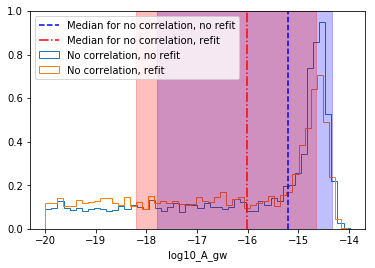

In [29]:
#Plot upperlimit histogram on gwb for closed_2_1 and closed_2_2
log = True

if log == False:
    plt_chain_closed_2_1 = 10**chain_closed_2_1[burn_closed_2_1:,index_from_eof]
    plt_chain_closed_2_2 = 10**chain_closed_2_2[burn_closed_2_2:,index_from_eof]
else:
    plt_chain_closed_2_1 = chain_closed_2_1[burn_closed_2_1:,index_from_eof]
    plt_chain_closed_2_2 = chain_closed_2_2[burn_closed_2_2:,index_from_eof]

#Get median of GWB histogram
gwb_med_closed_2_1 = np.median(plt_chain_closed_2_1)
gwb_med_closed_2_2 = np.median(plt_chain_closed_2_2)
#Get avg and std dev of GWB histogram
gwb_mean_closed_2_1 = np.mean(plt_chain_closed_2_1)
gwb_mean_closed_2_2 = np.mean(plt_chain_closed_2_2)
gwb_sigma_closed_2_1 = np.std(plt_chain_closed_2_1)
gwb_sigma_closed_2_2 = np.std(plt_chain_closed_2_2)

plt.hist(plt_chain_closed_2_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit')
plt.hist(plt_chain_closed_2_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')
plt.axvline(x=gwb_med_closed_2_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_2_2, linestyle = '-.', color = 'r', label = 'Median for no correlation, refit')
plt.axvspan(gwb_mean_closed_2_1-gwb_sigma_closed_2_1, gwb_mean_closed_2_1+gwb_sigma_closed_2_1, alpha=0.25, color='b')
plt.axvspan(gwb_mean_closed_2_2-gwb_sigma_closed_2_2, gwb_mean_closed_2_2+gwb_sigma_closed_2_2, alpha=0.25, color='r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'upper left')
plt.show()

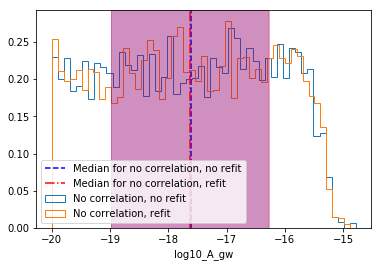

In [25]:
#Plot upperlimit histogram on gwb for closed_3_1 and closed_3_2
log = True

if log == False:
    plt_chain_closed_3_1 = 10**chain_closed_3_1[burn_closed_3_1:,index_from_eof]
    plt_chain_closed_3_2 = 10**chain_closed_3_2[burn_closed_3_2:,index_from_eof]
else:
    plt_chain_closed_3_1 = chain_closed_3_1[burn_closed_3_1:,index_from_eof]
    plt_chain_closed_3_2 = chain_closed_3_2[burn_closed_3_2:,index_from_eof]

#Get median of GWB histogram
gwb_med_closed_3_1 = np.median(plt_chain_closed_3_1)
gwb_med_closed_3_2 = np.median(plt_chain_closed_3_2)
#Get avg and std dev of GWB histogram
gwb_mean_closed_3_1 = np.mean(plt_chain_closed_3_1)
gwb_mean_closed_3_2 = np.mean(plt_chain_closed_3_2)
gwb_sigma_closed_3_1 = np.std(plt_chain_closed_3_1)
gwb_sigma_closed_3_2 = np.std(plt_chain_closed_3_2)

plt.hist(plt_chain_closed_3_1, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, no refit')
plt.hist(plt_chain_closed_3_2, bins = n_bins, density = True,histtype = 'step',label = 'No correlation, refit')
plt.axvline(x=gwb_med_closed_3_1, linestyle = '--', color = 'b', label = 'Median for no correlation, no refit')
plt.axvline(x=gwb_med_closed_3_2, linestyle = '-.', color = 'r', label = 'Median for no correlation, refit')
plt.axvspan(gwb_mean_closed_3_1-gwb_sigma_closed_3_1, gwb_mean_closed_3_1+gwb_sigma_closed_3_1, alpha=0.25, color='b')
plt.axvspan(gwb_mean_closed_3_2-gwb_sigma_closed_3_2, gwb_mean_closed_3_2+gwb_sigma_closed_3_2, alpha=0.25, color='r')
plt.xlabel(pars[index_from_eof])
plt.legend(loc = 'lower left')
plt.show()